# Compare $\frac{d\Sigma}{dk}$ with scissor correction

In [51]:
#def plot_bands(fname):
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import re
# fname="../LiCoO2/optics/full_optics_GW"
# E=np.loadtxt(fname,comments="%").T
fig,ax=plt.subplots(figsize=(14,4))
# ax.plot(E[0]*13.6,E[1],c="r",label="x w/o $d\Sigma/dk$")
# ax.plot(E[0]*13.6,E[2],c="b",label="y w/o $d\Sigma/dk$")
# ax.plot(E[0]*13.6,E[3],c="g",label="z w/o $d\Sigma/dk$")

# fname="../LiCoO2/optics/full_optics_GW_sigma"
# E=np.loadtxt(fname,comments="%").T
# ax1 = ax.twinx()
# ax.plot(E[0]*13.6,E[1],c="r",linestyle=":",label="x w $d\Sigma/dk$")
# ax.plot(E[0]*13.6,E[2],c="b",linestyle=":",label="y w $d\Sigma/dk$")
# ax.plot(E[0]*13.6,E[3],c="g",linestyle=":",label="z w $d\Sigma/dk$")

# fname="../LiCoO2/optics/full_optics_GW_sigma_2"
# E=np.loadtxt(fname,comments="%").T
# ax1.plot(E[0]*13.6,E[1],c="r",linestyle="-",label="x w sic")
# ax1.plot(E[0]*13.6,E[2],c="b",linestyle="-",label="y w sic")
# ax1.plot(E[0]*13.6,E[3],c="g",linestyle="-",label="z w sic")

# fig.legend()

plt.show()

/usr/local/Caskroom/miniconda/base/lib/python3.7/site-packages/ipykernel_launcher.py:28: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.


### Avg lmf-RPA Im($\epsilon$)

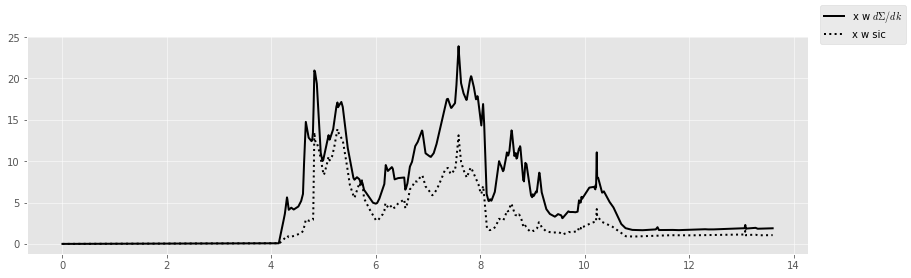

In [138]:
def norm(x):
    return x / np.trapz(x)
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import re
fig,ax=plt.subplots(figsize=(14,4))
fname="../LiCoO2/optics/full_optics_GW_sigma"
E=np.loadtxt(fname,comments="%").T
ax.plot(E[0]*13.6,np.mean([E[1],E[2],E[3]],axis=0),c="k",linestyle="-",label="x w $d\Sigma/dk$")
fname="../LiCoO2/optics/full_optics_GW_sigma_2"
E=np.loadtxt(fname,comments="%").T
ax.plot(E[0]*13.6,np.mean([E[1],E[2],E[3]],axis=0),c="k",linestyle=":",label="x w sic")
fig.legend()

plt.show()

# Band 2 Band

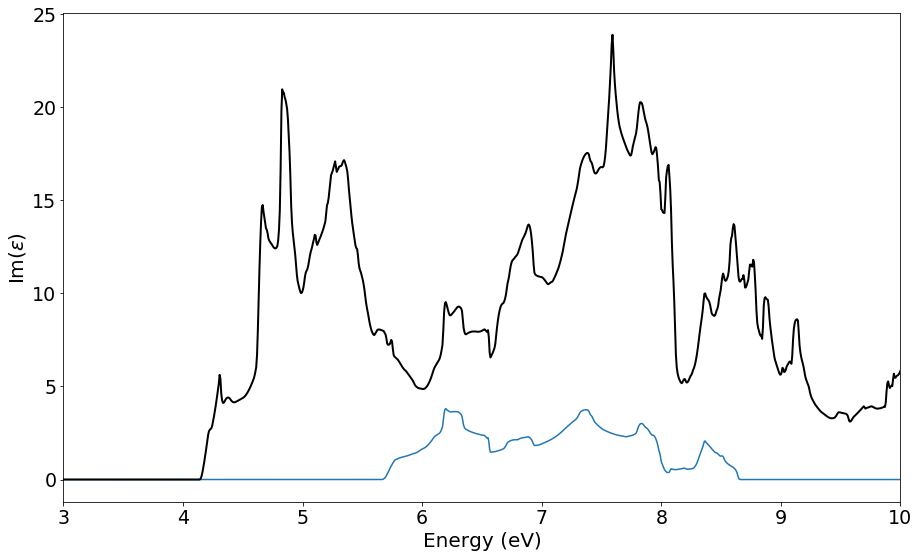

In [2]:
#def plot_bands(fname):

import numpy as np
import matplotlib.pyplot as plt
import re
#plt.style.use('seaborn-paper')
#plt.style.use(['science','high-vis'])
fname="../LiCoO2/optics/popt.temp"
lines = open(fname).read().split('\n')
r,c=int(lines[0].split(" ")[2]),int(lines[0].split(" ")[4])
vals=[]
for i in "  ".join(lines[1:]).split("  "):
    try:
        vals.append(float(i))
    except:
        None
e=[t*13.605 for t in vals[0::c]]
vals=np.array(vals)
fig,ax=plt.subplots(figsize=(15,9))
l=3
m=12
vals1=np.arange(1,c-1,3)
plot=1
if plot:
    for i in [vals1[1]]:
        y=(vals[i::c]+vals[i+1::c]+vals[i+2::c])/3.
        plt.plot(e,y,label=str(l)+"-"+str(m),alpha=1,lw=1.5)
        m=m+1
        if m==14:
            m=12
            l=l+1
bands={}
vals_bands=[]

for i in vals1:
    vals_bands.append((vals[i::c]+vals[i+1::c]+vals[i+2::c])/3.)
    #plt.plot(e,y,label=str(l)+"-"+str(m),alpha=1,lw=1.5)
    #labels.append(str(l)+"-"+str(m))
    bands[str(l)+"-"+str(m)]=(vals[i::c]+vals[i+1::c]+vals[i+2::c])/3.
    m=m+1
    if m==14:
        m=12
        l=l+1
full=[]
for i in np.arange(1,c-1,3):
    y=(vals[i::c]+vals[i+1::c]+vals[i+2::c])/3.
    full.append(y)
plt.plot(e,np.sum(np.array(full),axis=0),lw=2,label="total",c="k")
#plt.legend()
plt.xlim([3,10])
plt.rc('legend',**{'fontsize':17})
#lgd=ax.legend(loc='center right', ncol=1, bbox_to_anchor=(1.13,.5))

#plt.grid()
plt.xticks(size = 19)
plt.yticks(size = 19)
plt.ylabel("Im($\epsilon$)", fontsize=20)
plt.xlabel("Energy (eV)", fontsize=20)
plt.show()
#fig.savefig('Band.png', bbox_extra_artists=(lgd,), bbox_inches='tight',dpi=400)

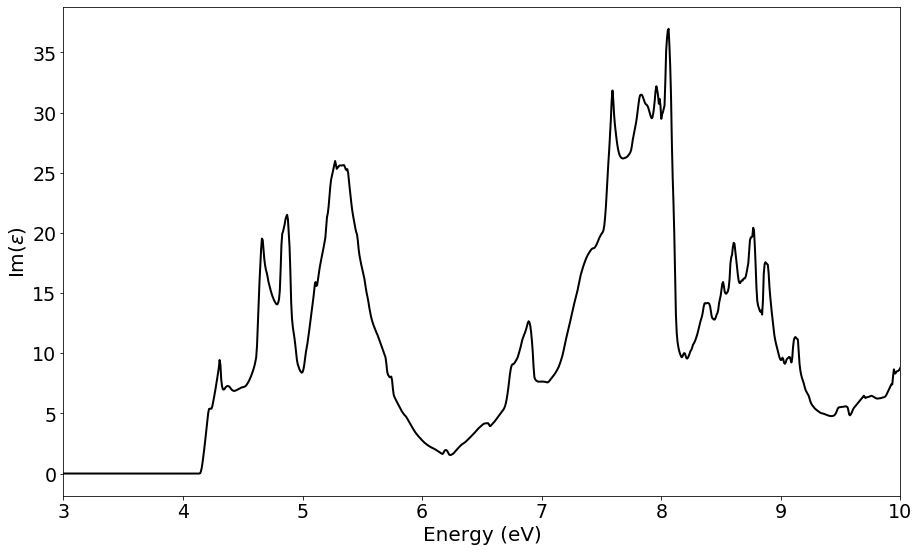

In [28]:
#def plot_bands(fname):

import numpy as np
import matplotlib.pyplot as plt
import re
#plt.style.use('seaborn-paper')
#plt.style.use(['science','high-vis'])
fname="../LiCoO2/optics/popt.temp"
lines = open(fname).read().split('\n')
r,c=int(lines[0].split(" ")[2]),int(lines[0].split(" ")[4])
vals=[]
for i in "  ".join(lines[1:]).split("  "):
    try:
        vals.append(float(i))
    except:
        None
e=[t*13.605 for t in vals[0::c]]
vals=np.array(vals)
fig,ax=plt.subplots(figsize=(15,9))
l=3
m=12
num_bands=int((c-1)/3) 
vals1=np.arange(1,num_bands +1,1)
plot=1
direction="z"
vals_bandsx=[]
vals_bandsz=[]
bands=[]
if plot:
    for i in vals1:
       #y=(vals[i::c]+vals[i+1::c]+vals[i+2::c])/3.
        if direction=="x":
            y=vals[i::c]
            #plt.plot(e,y,label=str(l)+"-"+str(m),alpha=1,lw=1.5)
            vals_bandsx.append(y)
            
        if direction=="z":
            y=vals[i+num_bands*2::c]
            #plt.plot(e,y,label=str(l)+"-"+str(m),alpha=1,lw=1.5)
            vals_bandsz.append(y)
        bands.append(str(l)+"-"+str(m))    
        l=l+1
        if l==12:
            l=3
            m=m+1

vals_bands=[]

fullx=[]
fullz=[]

for i in np.arange(1,num_bands +1,1):
    yx=(vals[i::c])
    fullx.append(yx)
    yz=(vals[i+num_bands*2::c])
    fullz.append(yz)
if direction=="x":
    plt.plot(e,np.sum(np.array(fullx),axis=0),lw=2,label="total",c="k")
if direction=="z":
    plt.plot(e,np.sum(np.array(fullz),axis=0),lw=2,label="total",c="k",linestyle="-")
#plt.legend()
plt.xlim([3,10])
plt.rc('legend',**{'fontsize':17})
#lgd=ax.legend(loc='center right', ncol=1, bbox_to_anchor=(1.13,.5))

#plt.grid()
plt.xticks(size = 19)
plt.yticks(size = 19)
plt.ylabel("Im($\epsilon$)", fontsize=20)
plt.xlabel("Energy (eV)", fontsize=20)
plt.show()
#fig.savefig('Band_x.png', bbox_inches='tight',dpi=400)#, bbox_extra_artists=(lgd,))

In [50]:
int((c-1)/3) 

18

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:27: RuntimeWarning: invalid value encountered in true_divide


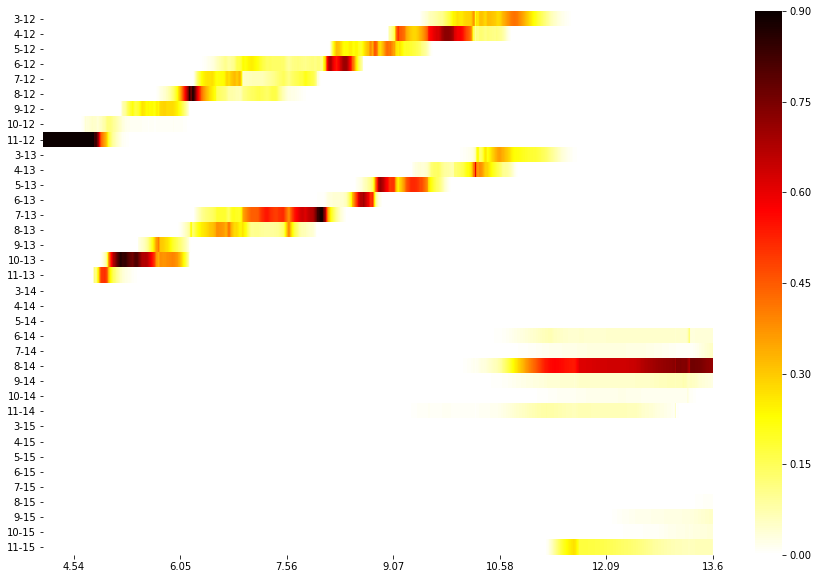

In [29]:
# fig,ax=plt.subplots(figsize=(15,9))
# vals_bands=np.array(vals_bands)
# plt.style.use("ggplot")
# vals_bands.shape
# plt.contourf(e,np.arange(1,19,1),np.true_divide(vals_bands, vals_bands.sum(axis=0, keepdims=True)),vmin=0,cmap="hot_r")
# plt.colorbar()
# plt.xlim([4.1,10])
# plt.show()


# for j,i in enumerate(vals_bands):
#     plt.plot(e,i+j*2)
# plt.xlim([3,10])
# plt.show()

num_ticks = 10
# the index of the position of yticks
yticks = np.linspace(0, len(e) - 1, num_ticks, dtype=np.int)
# the content of labels of these yticks
yticklabels = [np.round(e[idx],2) for idx in yticks]

vals_bands=np.array(vals_bandsz)
import seaborn as sns
import matplotlib.ticker as ticker
fig,ax=plt.subplots(figsize=(15,10))
result = sns.heatmap(np.true_divide(vals_bands,\
                vals_bands.sum(axis=0, keepdims=True)),cmap="hot_r",\
                 yticklabels=bands,vmin=0,vmax=.9,\
                    xticklabels=yticklabels)
                #vmin=0, vmax=.1)



ax.set_xticks(yticks)
plt.yticks(rotation=0)
plt.xticks(rotation=0)
plt.xlim([min(range(len(e)), key=lambda i: abs(e[i]-4.1)),min(range(len(e)), key=lambda i: abs(e[i]-e[-1]))])
plt.show()
fig.savefig('Band_trans_z_full.png', bbox_inches='tight',dpi=600)

In [13]:
e[-1]

13.605

In [151]:
from colour import Color as c
c(rgb=(1, 0, 0)).rgb+c(rgb=(1, 1, 0)).rgb

(1.0, 0.0, 0.0, 1.0, 0.9999999999999998, 0.0)

# BSE vs RPA

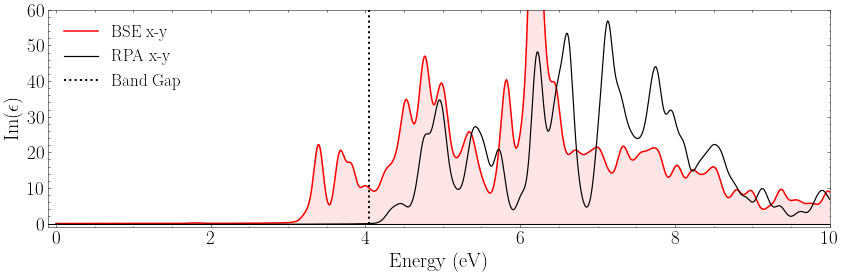

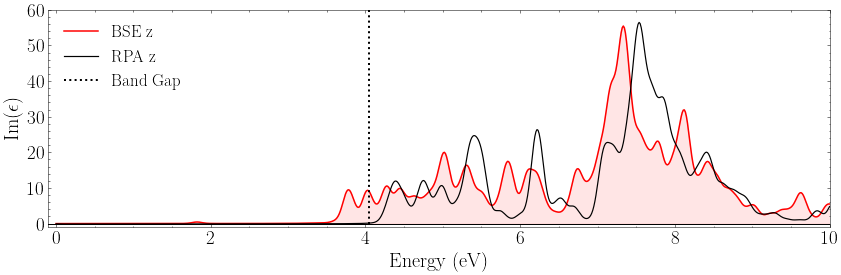

In [34]:
def norm(x):
    return x / np.trapz(x)
def spectrum(E,osc,sigma,x):
    gE=[]
    for Ei in x:
        tot=0
        for Ej,os in zip(E,osc):
            tot+=os*np.exp(-((((Ej-Ei)/sigma)**2)))
        gE.append(tot)
    return gE

import numpy as np
import matplotlib.pyplot as plt
plt.style.use(['science','high-vis'])


import re
fig,ax=plt.subplots(figsize=(14,4))

fname="../LiCoO2/optics/BSE_xy"
E=np.loadtxt(fname,comments="#").T
r=spectrum(E[0],E[2],sigma=.08,x=E[0])
ax.plot(E[0],r,c="r",linestyle="-",label="BSE x-y",lw=1.5)
ax.fill_between(E[0],r, color='red',alpha=.1)


fname="../LiCoO2/optics/RPA_xy"
E=np.loadtxt(fname,comments="#").T
r=spectrum(E[0],E[2],sigma=.08,x=E[0])
ax.plot(E[0],r,c="k",linestyle="-",lw=1.2,label="RPA x-y")
plt.plot([4.05,4.05],[0,100],linestyle=":",lw=2,label="Band Gap",c="k")
plt.axhline(0,linestyle="-",c="k")


plt.xlim([-.1,10])
plt.ylim([-1,60])
plt.rc('legend',**{'fontsize':17})
plt.xticks(size = 19)
plt.yticks(size = 19)
plt.ylabel("Im($\epsilon$)", fontsize=20)
plt.xlabel("Energy (eV)", fontsize=20)
plt.legend(loc='upper left')
plt.show()
fig.savefig('/Users/santoshkumar/Desktop/Physics Projects/LiCoO2/optics/BSE-RPA-xy.png', bbox_inches='tight',dpi=600)

fig,ax=plt.subplots(figsize=(14,4))
fname="../LiCoO2/optics/BSE_z"
E=np.loadtxt(fname,comments="#").T
r=spectrum(E[0],E[2],sigma=.08,x=E[0])
ax.plot(E[0],r,c="r",linestyle="-",label="BSE z",lw=1.5)
ax.fill_between(E[0],r, color='r',alpha=.1)

fname="../LiCoO2/optics/RPA_z"
E=np.loadtxt(fname,comments="#").T
r=spectrum(E[0],E[2],sigma=.08,x=E[0])
ax.plot(E[0],r,c="k",linestyle="-",lw=1.2,label="RPA z")
plt.plot([4.05,4.05],[0,100],linestyle=":",lw=2,label="Band Gap",c="k")
plt.axhline(0,linestyle="-",c="k")

plt.xlim([-.1,10])
plt.ylim([-1,60])
plt.rc('legend',**{'fontsize':17})
plt.xticks(size = 19)
plt.yticks(size = 19)
plt.ylabel("Im($\epsilon$)", fontsize=20)
plt.xlabel("Energy (eV)", fontsize=20)
plt.legend(loc='upper left')
plt.show()
fig.savefig('/Users/santoshkumar/Desktop/Physics Projects/LiCoO2/optics/BSE-RPA-z.png', bbox_inches='tight',dpi=600)



plot_exciton=0
if plot_exciton:
    fig,ax=plt.subplots(figsize=(14,4))
    fname="../LiCoO2/optics/RPA_fine"
    E1=np.loadtxt(fname,comments="#").T
    fname="../LiCoO2/optics/BSE_fine"
    E2=np.loadtxt(fname,comments="#").T
    ax.plot(E[0],(E2[2]-E1[2])/E1[2],c="k",linestyle="-",label="BSE")
    e=(E2[2]-E1[2])/E1[2]
    ax.plot(E[0],e,c="k",linestyle="-",label="BSE")
    #plt.ylim([-1,1])
    #plt.xlim([-.1,10])
    plt.show()

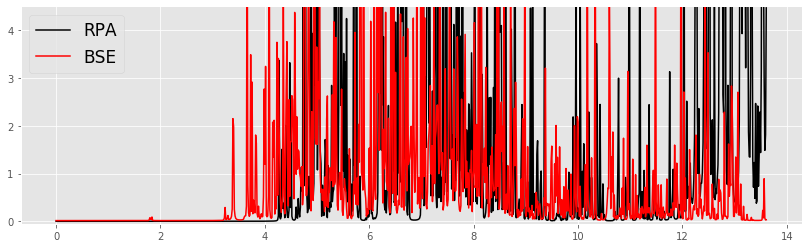

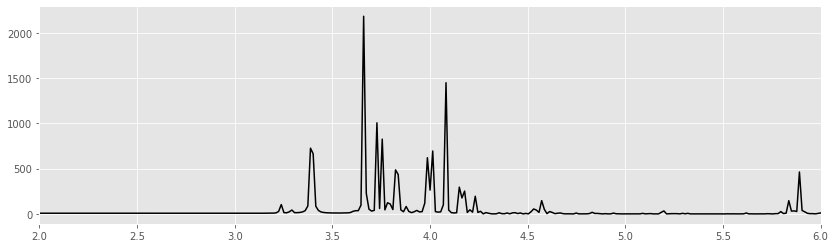

In [84]:
def norm(x):
    return x / np.trapz(x)
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import re
fig,ax=plt.subplots(figsize=(14,4))
fname="../LiCoO2/optics/RPA_2"
E=np.loadtxt(fname,comments="#").T
ax.plot(E[0],E[2],c="k",linestyle="-",label="RPA")

fname="../LiCoO2/optics/BSE_1"
E=np.loadtxt(fname,comments="#").T
ax.plot(E[0],E[2],c="r",linestyle="-",label="BSE")
#plt.xlim([-.1,11])
#plt.ylim([-.05,4.5])
plt.legend()
plt.show()
fig,ax=plt.subplots(figsize=(14,4))
fname="../LiCoO2/optics/RPA_2"
E1=np.loadtxt(fname,comments="#").T
fname="../LiCoO2/optics/BSE_1"
E2=np.loadtxt(fname,comments="#").T
ax.plot(E[0],(E2[2]-E1[2])/E1[2],c="k",linestyle="-",label="BSE")
#plt.ylim([-1,1])
plt.xlim([2,6])
plt.show()

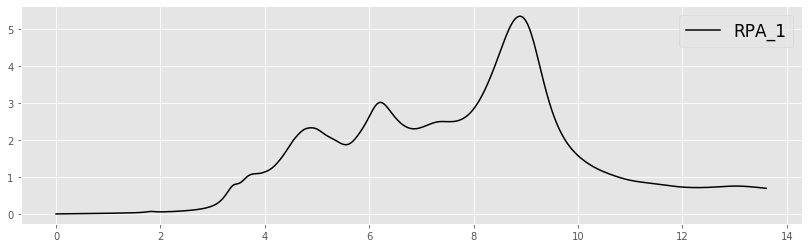

In [65]:
def norm(x):
    return x / np.trapz(x)
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import re
fig,ax=plt.subplots(figsize=(14,4))
fname="../LiCoO2/optics/BSE_1"
E=np.loadtxt(fname,comments="#").T
ax.plot(E[0],E[2],c="k",linestyle="-",label="RPA_1")
#plt.xlim([-.1,11])
#plt.ylim([-.05,4.5])
plt.legend()
plt.show()

In [65]:
from questaal_reader import get_bands
p=get_bands("./LiCoO2-bands-data/bnds.temp")
from pymatgen.electronic_structure.plotter import BSPlotter as bp
#bp(p).get_plot()

/Users/santy/Google Drive File Stream/My Drive/github projects/questaal-reader/questaal_reader.py:307: UserWarning: Only site.ext format 15 supported at present 
 if things dont work That might be the problem
  warnings.warn("Only site.ext format 15 supported at present \n if things dont work That might be the problem")


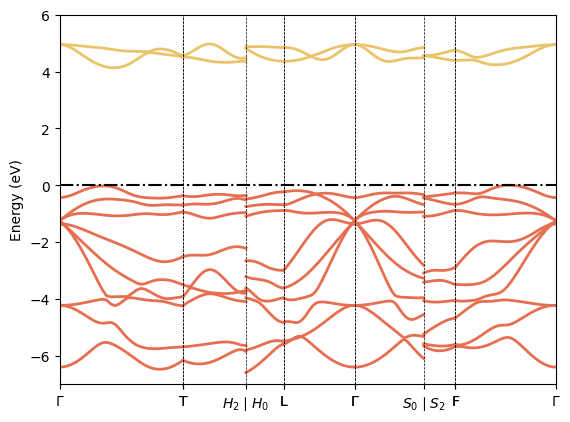

In [66]:
fig,ax=plt.subplots()
for i in range(len(bp(p).bs_plot_data()['distances'])):
    d=bp(p).bs_plot_data()['distances'][i]
    e=bp(p).bs_plot_data()['energy'][i]['1']
    for k in e:
        if k[0]>0:c="#e9c46a"
        else:c="#e76f51"
        plt.plot(d,k,c=c,lw=2)

for j,i in enumerate(bp(p).bs_plot_data()['ticks']["distance"]):
    plt.axvline(i,c="k",ls="--",lw=.5)
ax.set_xticks(bp(p).bs_plot_data()['ticks']["distance"])
ax.set_xticklabels(bp(p).bs_plot_data()['ticks']["label"])
ax.axhline(0,ls="-.",c="k")
plt.ylim(-7,6)
ax.autoscale(enable=True, axis='x', tight=True)
ax.set_ylabel("Energy (eV)")
plt.show()